In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.api as stats
from ast import literal_eval

In [2]:
# read in csv files
best_picture = pd.read_csv('../data/best_picture.csv')
movies_2015_2024 = pd.read_csv('../data/movies_2015_2024.csv')
movies_merged = pd.read_csv('../data/movies_merged.csv')
merged_cpi = pd.read_csv('../data/merged_cpi.csv')
merged_genre_explode = pd.read_csv('../data/merged_genre_explode.csv')

# An Analysis of Movie Performance, Part 2: Data Analysis and Presentation

In this part, you’ll use the datasets you gathered in Part 1 to explore what makes a movie successful. You’ll perform exploratory data analysis, create visualizations, and, where appropriate, fit simple statistical models.

The main goal is to discover patterns and communicate them clearly, not just to crunch numbers.

**Learning Objectives**  
By the end of this part, you should be able to:  
* Combine and clean multiple real-world datasets from different sources.  
* Conduct exploratory data analysis (EDA) with pandas and visualization libraries.  
* Apply basic statistical modeling to test hypotheses.  
* Communicate insights effectively to a non-technical audience.

1. **Exploratory Analysis**  
Begin by understanding your dataset as a whole. Look for trends, outliers, and relationships.  

    Examples of questions to explore:  
    * How popular is each genre over the last decade?
    * How do budget and revenue vary by year or by genre?  
    * What is the average profit margin (revenue - budget) across genres or years?  
    * How do movie ratings (vote average) relate to box-office performance?  
    * Adjust all financial metrics (budget and revenue) for inflation to 2024 dollars using CPI data.

    Deliverables:  
    * At least 3-4 clearly labeled visualizations (bar charts, scatter plots, or boxplots).  


2. **Performance Comparisons**  
    Use your merged dataset to examine whether recognition and awards are associated with better performance.  
    Investigate:  
    * Do Best Picture nominees or winners tend to earn higher box-office revenue than non-nominated movies?  
    * Are certain genres or types of roles more common among award-winning films?
    * (If you did the optional scrape) Do movies featuring a Best Actor or Best Actress winner in their cast tend to perform better?  
  
    Deliverables:  
    * At least one regression model 

> ## Award Winning Movie Revenue
>
> 
> Here we observe the **revenue difference** in award winning movies and non-award winning movies. Award winning movies generate **1.2%** more annual revenue than non-award winning movies. This is valuable insight but a statistic model can measure correlation and would give a more accurate depiction.
>
> 
>* Award winning movies generate **1.2% more revenue on average.**
>* There is not a marginal difference in revenue based on awards.
>* A **statistical model** will reveal more information.

In [3]:
# create dataframe with award winning movies
award_winners = movies_merged[movies_merged['Winner'] == 'Yes']
award_winners.head(2)

,title,vote_average,vote_count,budget,revenue,imdb_id,id,movie_genres,release_year,Winner
40,All Quiet on the Western Front,7.722,4376,20000000,0,tt1016150,49046,"['War', 'History', 'Drama']",2022,Yes
58,Anora,7.000,2729,6000000,56286295,tt28607951,1064213,"['Drama', 'Comedy', 'Romance']",2024,Yes


In [4]:
# create dataframe with non-award winning movies
non_award_winners = movies_merged[movies_merged['Winner'] == 'No']
non_award_winners.head(2)

,title,vote_average,vote_count,budget,revenue,imdb_id,id,movie_genres,release_year,Winner
0,#Alive,7.227,1955,6300000,13416285,tt10620868,614696,"['Action', 'Horror', 'Science Fiction']",2020,No
1,10 Cloverfield Lane,6.994,8359,15000000,110216998,tt1179933,333371,"['Thriller', 'Science Fiction', 'Drama', 'Horr...",2016,No


In [5]:
# generate percent difference in average revenue
(award_winners['revenue'].mean() - non_award_winners['revenue'].mean()) / award_winners['revenue'].mean()

np.float64(0.011985465683477832)

> ## Filter and Check for Correlation
>
> We have now conducted a sample statistic to see the difference in revenue for award winning and non-award winning movies. It isnt a huge difference based on what we found. Now we want to get a more exact look using **Pearson Correlation.** Below I filter the dataframe for values that contain award winning entries then run a correlation function on the values.
>
>* Filter for movies that have **award entries.**
>* Evaluate Correlation.
>* Visualize difference in **average revenue.**

In [6]:
# create binary column for winning values 
merged_cpi_model_data = merged_cpi
merged_cpi_model_data['winner_binary'] = merged_cpi_model_data['Winner'].map({'Yes': 1, 'No': 0})

In [7]:
# create object to filter dataframe
valid_titles = best_picture['Film']
valid_years = best_picture['Year']

In [8]:
# filter dataframe for movies with award winning entries
filtered_movies_w_award_entry = merged_cpi_model_data[
    merged_cpi_model_data['title'].isin(valid_titles) & 
    merged_cpi_model_data['release_year'].isin(valid_years)
]

In [9]:
# show correlation between variables
filtered_movies_w_award_entry[['winner_binary', 'revenue_2024']].corr()

,winner_binary,revenue_2024
winner_binary,1.000000,-0.059594
revenue_2024,-0.059594,1.000000


> ## Evaluate Correlation
>
> This pearson correlation test reveals that there is a very small negative correlation between award winning movies and revenue. The margin is very slim and could be attributed to chance. Next we will create a **hypothesis test** to see if this correlation could be due to random error. Below we can see a visualization to share just how small that revenue difference is.
>
>* Award winning and non-award winning movies share **similair averages.**
>* Non-award winning movies have many outliers with **high revenue.**

/var/folders/4y/0t9f134178bbfj5m299wl_7h0000gn/T/ipykernel_49070/3940077716.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


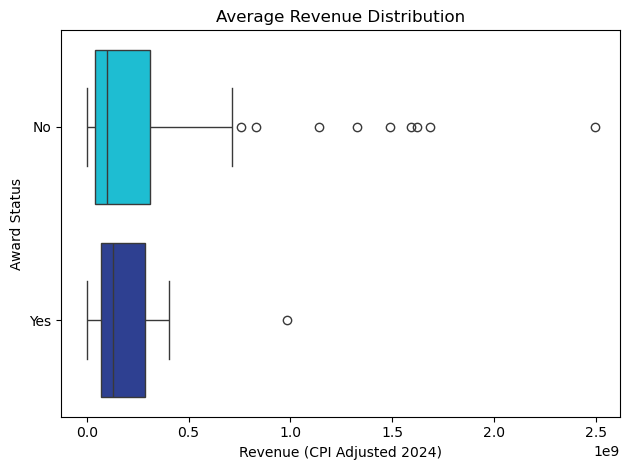

In [18]:
# import colors from powerpoint
dark_blue = "#1e35a1"
light_blue = "#00d4f0"

# visualize average revenue for award and non-award winning movies
sns.boxplot(
    y='Winner', 
    x='revenue_2024', 
    data=filtered_movies_w_award_entry,
    palette= {"No": light_blue ,"Yes": dark_blue}
)

# customize plot
plt.title("Average Revenue Distribution")
plt.xlabel("Revenue (CPI Adjusted 2024)")
plt.ylabel("Award Status")

# save plot to computer
plt.tight_layout()
plt.savefig('../assets/Average Revenue Distribution.png', dpi = 150);

plt.show()

In [11]:
# drop missing values and create sample variables
sample_award = award_winners['revenue'].dropna()
sample_non = non_award_winners['revenue'].dropna()

# create sample stats
mean_award_revenue = sample_award.mean()
mean_non_award_revenue = sample_non.mean()
diff_means = mean_award_revenue - mean_non_award_revenue

# display sample statistics
print("Average revenue for winners:", mean_award_revenue)
print("Average revenue for non-winners:", mean_non_award_revenue)
print("Observed Difference:", diff_means)

Average revenue for winners: 196708081.54545453
Average revenue for non-winners: 194350443.58442873
Observed Difference: 2357637.9610258043


> ## Hypothesis Test
>
> From what we have observed there is a very small difference in average revenue from award winning and non-award winning movies. There is a small negative correlation between awards and average revenue. We have an observed difference of nearly **1.2%** that rounds out to nearly a **2.4 million dollar difference in revenue.** We now will conduct a hypothesis test to see if this is due to chance or if there is actually a statistically significant difference in average revenue based on awards.
>
>* Create bootstrap resample
>* Build 95% confidence interval
>* Evaluate difference in average revenue 

In [12]:
# number of bootstrap resamples
num_resamples = 10000

# bootstrap resample the mean revenue for each group
resample_award_means = (np.random.choice(sample_award, size=(num_resamples, len(sample_award)), replace=True).mean(axis=1))
resample_non_means = (np.random.choice(sample_non, size=(num_resamples, len(sample_non)), replace=True).mean(axis=1))

# bootstrap distribution of the difference in means
resample_diff_means = resample_award_means - resample_non_means

# confidence interval for difference in means
ci_low, ci_high = np.quantile(resample_diff_means, q=[0.025, 0.975])

# display confidence intervals and observed difference
print("Observed diff in means (winner - non):", diff_means)
print("95% bootstrap CI for diff in means:   ", ci_low, ci_high)

Observed diff in means (winner - non): 2357637.9610258043
95% bootstrap CI for diff in means:    -120599230.25865199 180840871.94655296


> ## Bootstrap CI Evaluation
>
> In this section we are testing our claim, "Award winning movies have higher revenue on average". This test gives us a very wide confidece interval. Because the confidence interval **contains zero** this observed diifference may be attributed to random chance. We can conclude that there is not statistically significant evidence to support our claim.
>
>* Fail to reject null hypothesis.
>* There is **not** statistically significant evidince to support our claim.
>* There is a zero in our confidence interval.

In [13]:
# filter for award winning movies
winning_genre_explode = merged_genre_explode[merged_genre_explode['Winner'] == 'Yes']

> ## Genres in Award Winning Movies
>
> This visualization shows which genres are most common in award winning movies. From the histogram it is clear that most award winning movies fall in the drama and history genres. This is not important because of what our correlation told us. Award winning movies are not correlated to higher revenue in movies.


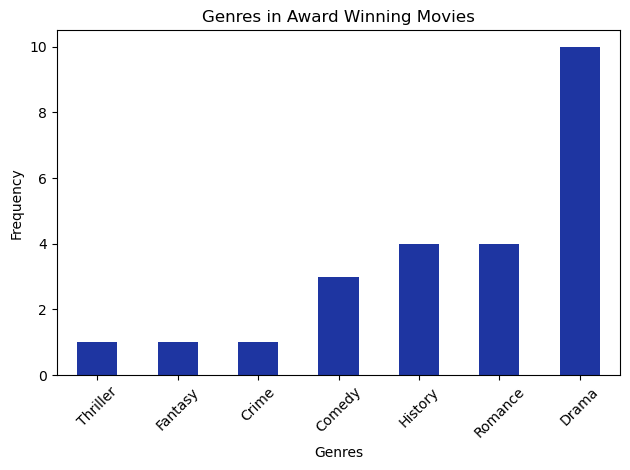

In [14]:
# visualize occurences of genre in award winning movies 
winning_genre_explode['movie_genres'].value_counts().sort_values().tail(7).plot(
    kind='bar',
    color=dark_blue
)
plt.title("Genres in Award Winning Movies")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=45);

# save plot to computer
plt.tight_layout()
plt.savefig('../assets/Genres in Award Winning Movies.png', dpi = 150);